<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2002%20-%20Higher%20Order%20Methods/2_Problem%20Sheet/02_PS%20Question%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 2 Question 3 - 2nd Order Taylor

The general form of the population growth differential equation
\begin{equation}  y^{'}=ty-ty^2, \ \ (0 \leq t \leq 2)\end{equation}
with the initial condition
\begin{equation} y(0)=\frac{1}{2}.\end{equation}

Apply __2nd Order Taylor__ to approximate the solution of the given initial value problems using the indicated number of time steps. Compare the approximate solution with the given exact solution, and compare the actual error with the theoretical error.

In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

## General Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
\begin{equation}  h=\frac{b-a}{N}.\end{equation}
## Specific Discrete Interval
Here the interval is $0\leq t \leq 2$ with $N=4$ 
\begin{equation}  h=\frac{2-0}{4}=0.5.\end{equation}
This gives the 5 discrete points with stepsize h=0.5:
\begin{equation}  t_0=0, \ t_1=0.5, \ ... t_{4}=2. \end{equation}
This is generalised to 
\begin{equation}  t_i=0+i0.5, \ \ \ i=0,1,...,4.\end{equation}
The plot below illustrates the discrete time steps from 0 to 2.

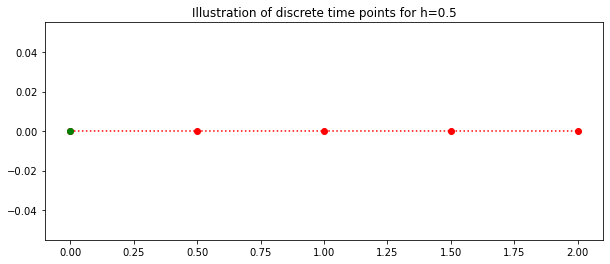

In [2]:
### Setting up time
t_end=2
t_start=0
N=4
h=(t_end-t_start)/(N)
t=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.plot(t[0],0*t[0],'o',color='green')


plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## 2nd Order Taylor Solution
The 2nd Order Taylor difference equation is given by
\begin{equation}  w_{i+1}=w_i+h\left[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)\right],\end{equation}
where
\begin{equation}  f(t_i,w_i)=t_iw_i-t_iw_i^2,\end{equation}
and
\begin{equation}  f'(t_i,w_i)=w_i+t_i(t_iw_i-t_iw_i^2)-w_i^2-t_i(2w_i(t_iw_i-t_iw_i^2)),\end{equation}
which gives
\begin{equation} w_{i+1}=w_i+h(t_iw_i-t_iw_i^2)+\frac{h^2}{2}(w_i+t_i(t_iw_i-t_iw_i^2)-w_i^2-t_i(2w_i(t_iw_i-t_iw_i^2))),\end{equation}

for $i=0,1,2,3$
with
$w_0=0.5$



In [3]:
IC=0.5
w=np.zeros(N+1)
e=np.zeros(N+1)
w[0]=IC

#e[0]=IC
for i in range (0,N):
  #  e[i+1]=e[i]+h*(t[i]*e[i]-t[i]*e[i]*e[i])
    w[i+1]=w[i]+h*(t[i]*w[i]-t[i]*w[i]*w[i])+h*h/2*(w[i]+t[i]*(t[i]*w[i]-t[i]*w[i]*w[i])-w[i]*w[i]-t[i]*(2*w[i]*(t[i]*w[i]-t[i]*w[i]*w[i])))

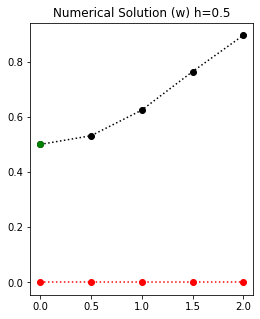

In [4]:
fig = plt.figure(figsize=(4,5))
# --- left hand plot
#ax = fig.add_subplot(1,4,1)
plt.plot(t,w,'o:',color='k')
plt.plot(t[0],w[0],'o',color='green')
plt.plot(t,e,'o:',color='r')


#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))
plt.show()


In [5]:

d = {'time t_i': t,    'Euler (w_i) ':w,    'Taylor (w_i) ':y,    'Exact Error( |y_i-w_i|) ':np.abs(y-w)}
df = pd.DataFrame(data=d)
df

NameError: name 'y' is not defined